# Megasena Parser

Read HTML file containing all numbers of the [Megasena](http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_megase.zip)


In [1]:
from bs4 import BeautifulSoup

In [4]:
MEGA_HTML = '/home/roger/Downloads/D_megase/D_MEGA.HTM'
html = open(MEGA_HTML).read()
soup = BeautifulSoup(html, 'html')

In [25]:
fcontent = lambda node: [x.text for x in node if x not in ('\n', ' ')]
content = [fcontent(x)[1:8] for x in soup.body.table.contents[2:] if x not in ('\n', ' ')]
content = [(x[0], map(int, x[1:])) for x in content]
content = [x for x in content if x[1]]
content[:10]

[(u'11/03/1996', [41, 5, 4, 52, 30, 33]),
 (u'18/03/1996', [9, 39, 37, 49, 43, 41]),
 (u'25/03/1996', [36, 30, 10, 11, 29, 47]),
 (u'01/04/1996', [6, 59, 42, 27, 1, 5]),
 (u'08/04/1996', [1, 19, 46, 6, 16, 2]),
 (u'15/04/1996', [19, 40, 7, 13, 22, 47]),
 (u'22/04/1996', [56, 38, 21, 20, 3, 5]),
 (u'29/04/1996', [53, 17, 38, 4, 47, 37]),
 (u'06/05/1996', [55, 43, 56, 54, 8, 60]),
 (u'13/05/1996', [25, 4, 18, 57, 21, 38])]

In [80]:
# Verify how many points (larger than 5 correct answers) have achieved for 6 numbers
BET=[]

def check_correct(content, vbet, threshold=4, show=True):
    winner = []
    for lottery in content:
        date, game = lottery
        correct = set(vbet).intersection(set(game))
        if len(correct) >= threshold:
            if show: print('Date: %s - Correct: %d' % (date, len(correct)))
            winner.append(len(correct))
    return winner
            
check_correct(content, BET, threshold=4)

Date: 11/03/1996 - Correct: 6


[6]

In [49]:
# Get the numbers with more occurrences

from collections import Counter
import operator

numbers = []
for lottery in content:
    _, game = lottery
    numbers.extend(game)
counter = Counter(numbers)
sorted_counter = sorted(counter.items(), key=operator.itemgetter(1), reverse=True)

In [50]:
highest_bet = [v for v, _ in sorted_counter[:6]]
highest_bet

[10, 5, 53, 4, 23, 33]

In [51]:
check_correct(content, highest_bet, threshold=4)

Date: 16/04/2014 - Correct: 4


In [83]:
# Test random numbers
import random

vbets = []
for i in range(1000):
    random_bet =  random.sample(xrange(1,61), 9)
    #print(random_bet)
    vbets.extend(check_correct(content, random_bet, threshold=4, show=False))

In [85]:
len(vbets)

7082

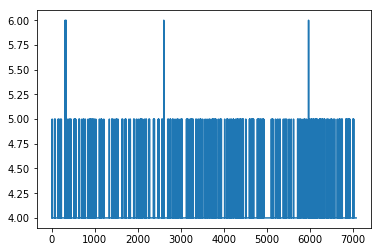

In [87]:
%matplotlib inline
from matplotlib import pyplot as plt

x = range(len(vbets))
plt.plot(x, vbets)
plt.show()